# Diffusion

This notebook illustrates the ranking of the nodes of a graph by [heat diffusion](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#diffusion).

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import Diffusion
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

In [5]:
diffusion = Diffusion()
seeds = {0: 0, 33: 1}
scores = diffusion.fit_transform(adjacency, seeds)

In [6]:
image = svg_graph(adjacency, position, scores=scores, seeds=seeds)

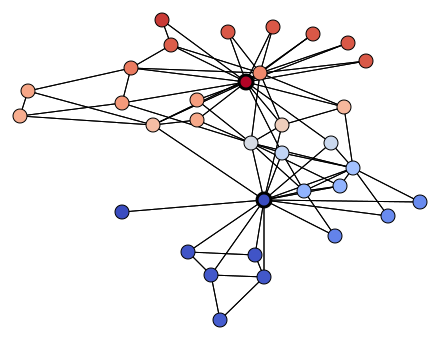

In [7]:
SVG(image)

## Digraphs

In [4]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [ ]:
picasso = 0
manet = 3

In [9]:
diffusion = Diffusion()
seeds = {picasso: 1, manet: 1}
scores = diffusion.fit_transform(adjacency, seeds, init=0)

TypeError: fit() got an unexpected keyword argument 'init'

In [ ]:
image = svg_digraph(adjacency, position, names, scores=scores, seeds=seeds)

In [ ]:
SVG(image)

## Bigraphs

In [6]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [ ]:
drive = 3
aviator = 9

In [11]:
diffusion = Diffusion()
seeds_row = {drive: 0, aviator: 1}
diffusion.fit(biadjacency, seeds_row=seeds_row)
scores_row = diffusion.scores_row_
scores_col = diffusion.scores_col_

In [12]:
image = svg_bigraph(biadjacency, names_row, names_col, scores_row=scores_row, scores_col=scores_col, 
                    seeds_row=seeds_row)

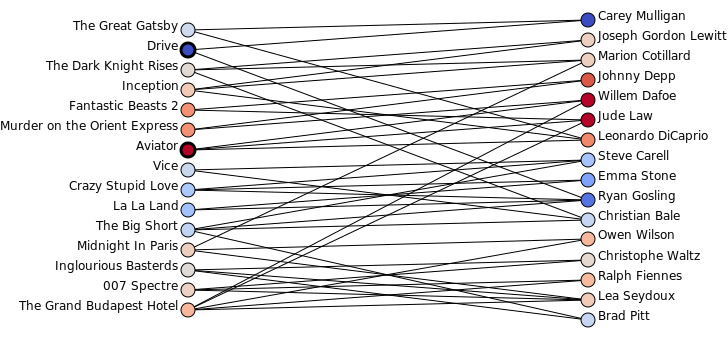

In [13]:
SVG(image)